**Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.**

*Inporting file from google drive.*

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Improting Libraries**

In [3]:
#Loading libraries & modules
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [4]:
df = pd.read_csv(r'drive/MyDrive/OASIS TASK/Iris.csv')

**Exploratory Data Analysis**

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Checking Total no of rows and columns**

In [7]:
df.shape

(150, 6)

*Dataset's variables information*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*To Check mean, count, standared deviation of the data is obtained in this step*

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Count Species.**

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**With their Measurements.**

In [12]:
# Species in the first 50 IDs
print(df[df['Id'] <= 50]['Species'].value_counts())
# Species in the second 50 IDs
print(df[(df['Id'] > 50) & (df['Id'] <= 100)]['Species'].value_counts())
# Species in the last 50 IDs
print(df[df['Id'] > 100]['Species'].value_counts())

Iris-setosa    50
Name: Species, dtype: int64
Iris-versicolor    50
Name: Species, dtype: int64
Iris-virginica    50
Name: Species, dtype: int64


**checking if we have any null values**

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Data Visualizations**

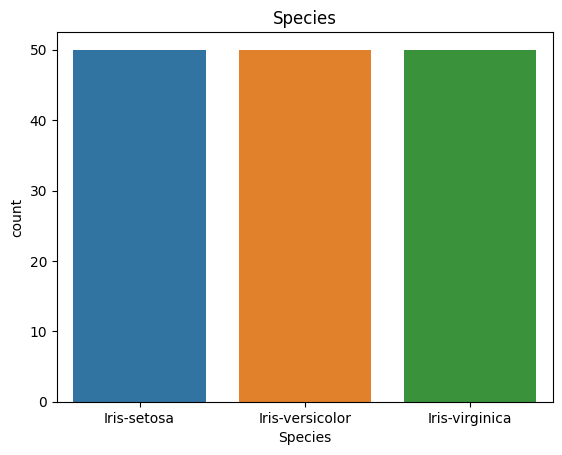

In [13]:
sns.countplot(data=df, x='Species')
plt.xlabel('Species')
plt.ylabel('count')
plt.title('Species')
plt.show()

**Data cleaning: we have unnecessarycolumn known as ID**

In [14]:
df = df.drop("Id",axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Percentage of each different types of Iris.**

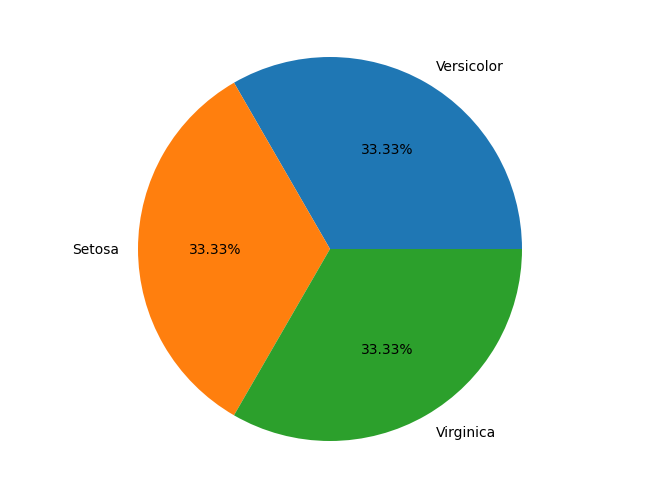

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

**Histogram representation**

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>],
       [<Axes: title={'center': 'species_encoded'}>, <Axes: >]],
      dtype=object)

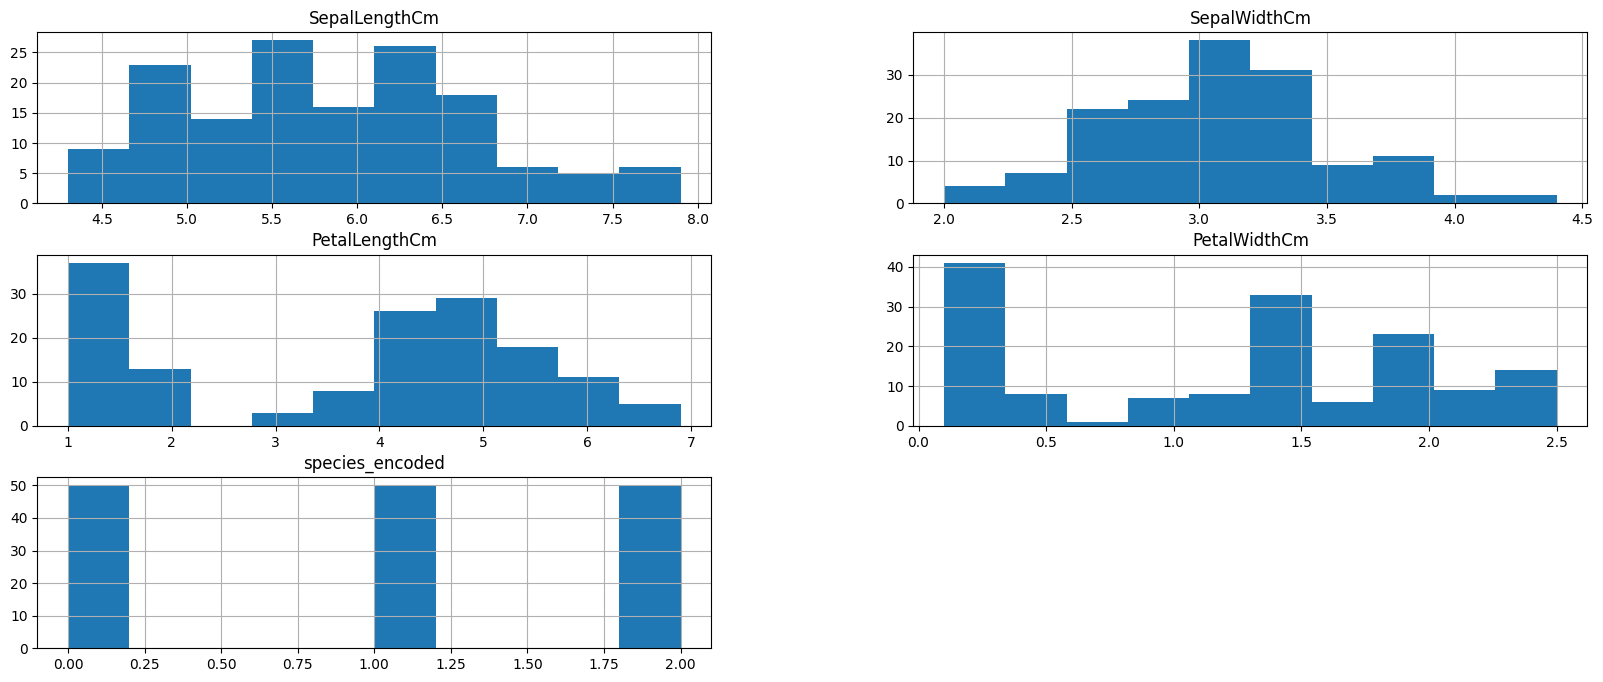

In [39]:
df.hist(figsize=(20, 8))

<Axes: >

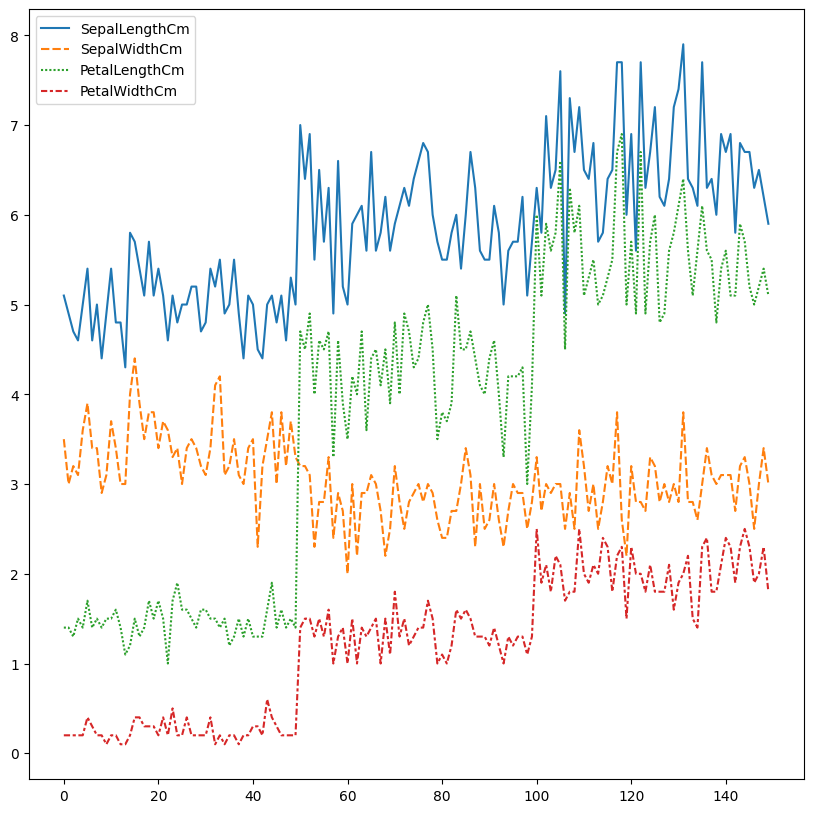

In [16]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df)

**Visual the whole Dataset.**

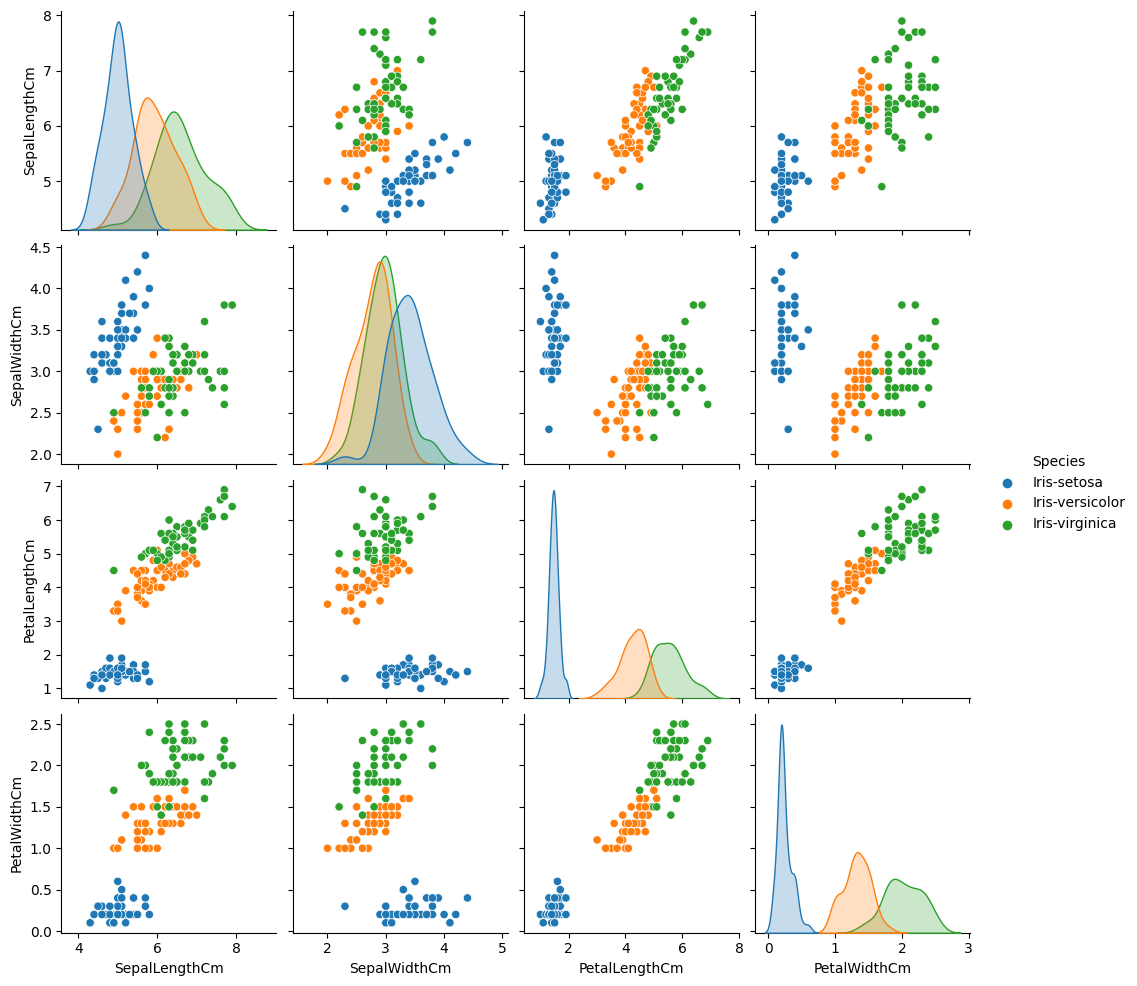

In [17]:
sns.pairplot(df, hue='Species')

*Spearating the features and target*

In [18]:
data = df.values
X = data[:,0:4]
Y = data[:,4]
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

**Matrix Type of Data set visualization**

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['Species'])

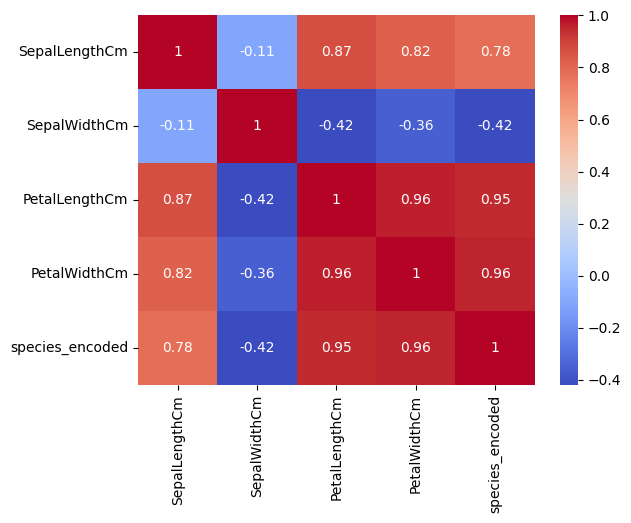

In [21]:
sns.heatmap(df.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm')
plt.show()

**Model Training**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#Using train_test_split we split the whole data into training and testing datasets.

(120, 4)
(30, 4)
(120,)
(30,)


*A support vector machine (SVM) is a supervised machine learning algorithm that analyzes data for classification and regression.*

In [23]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [24]:
predict = svn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.9333333333333333

**Using random Function.**

In [26]:
from numpy import random
x = random.randint(10,size=(3,4)) #used random function for random generation of values to test the model
print(x)

[[2 5 0 6]
 [9 8 8 9]
 [9 3 2 5]]


In [27]:
from numpy import random
x = random.randint(10,size=(3,4))
print(x)

[[0 6 9 0]
 [0 0 1 8]
 [2 9 7 1]]


In [28]:
predict = svn.predict(x)
print(predict)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica']


**LogisticRegression.**

In [31]:
# Let's create an instance for the LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [34]:
m = LogisticRegression()
m.fit(X_train, y_train)
prediction = m.predict(X_train)
print(accuracy_score(y_train,prediction))

0.9583333333333334


In [35]:
y = random.randint(10,size=(3,4))
print(y)

[[2 7 3 4]
 [1 9 0 3]
 [6 8 5 4]]


In [36]:
predict = svn.predict(y)
print(predict)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica']


In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test)*100,'%')

100.0 %




> ** Done By Kannan Santhana Gopala Krishnan **
